In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_e0afbdba7e6e4e2896dfe96facb8625f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_1fb655b970e4bae50e20c7d51f190258e4dd6ac3','domain': {'id': '8a56ebd98b3d4dbab5551fbc0ea9acde'},
            'password': 'Cka5.cw0ID9}DLqe'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_e0afbdba7e6e4e2896dfe96facb8625f('DefaultProjectjrkumarinibmcom', 'Environmental_Water_Quality_Ker_TN_Kar_total_new.csv'), index_col=0)
#df_data_1.head()
#df_data_1.info
df_data_1.var


<bound method DataFrame.var of                                      D.O   pH  CONDUCTIVITY  B.O.D.  NITRATE  \
"CAUVERY NAPOKULU"                   6.9  7.5            59     1.0     0.14   
"CAUVERY AT KUSHAL NAGAR "           7.0  7.8            93     1.0     0.13   
"CAUVERY AT KRS DAM"                 7.0  8.5           235     1.0     0.31   
"CAUVERY AT KAREKUARA"               6.9  8.5           243     1.0     0.33   
"CAUVERY AT SRIRANGAPATTANNA."       6.1  8.1           280     1.6     0.38   
"CAUVERY AT SATHYAGALAM "            7.6  8.1           336     1.0     0.46   
"CAUVERY AT BANNUR "                 7.0  8.1           331     1.3     0.39   
"CAUVERY AT RANGANATHITTU"           6.7  8.1           277     1.1     0.35   
"CAUVERY AT METTUR"                  6.5  8.1           417     1.5     0.20   
"CAUVERY AT BHAVANI "                6.2  8.0           475     1.1     0.25   
"CAUVERY AT PALLIPPALAYAM"           6.7  7.9           425     1.2     0.20   
"CAUVERY 

In [10]:
#it is important to standardize the variables to have mean zero and standard deviation 1 before
#performing PCA. We can do this using the scale() function from sklearn:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df_data_1), index=df_data_1.index, columns=df_data_1.columns)


In [19]:
#Compute Loading Vectors
from sklearn.decomposition import PCA
#pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df_data_1.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df_data_1.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6'])
pca_loadings



,V1,V2,V3,V4,V5,V6
D.O,-0.438988,0.116016,0.384935,0.786719,0.161108,0.027789
pH,-0.128674,0.762261,0.466528,-0.425141,0.062965,-0.006541
CONDUCTIVITY,0.484688,0.231486,0.150338,0.320418,-0.765165,-0.027285
B.O.D.,0.527618,0.004845,0.185019,0.098204,0.387252,0.726468
NITRATE,0.069878,0.593043,-0.730277,0.269548,0.193363,-0.008229
COLIFORM,0.522059,-0.013758,0.209854,0.123939,0.444126,-0.686015


In [22]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'], index=X.index)
df_plot.head()


,PC1,PC2,PC3,PC4,PC5,PC6
"""CAUVERY NAPOKULU""",-0.612562,-1.005936,-0.377983,0.207874,0.388113,-0.029555
"""CAUVERY AT KUSHAL NAGAR """,-0.715999,-0.399931,0.023699,-0.031312,0.398551,-0.034005
"""CAUVERY AT KRS DAM""",-0.807499,1.062962,0.850648,-0.684390,0.312451,-0.053738
"""CAUVERY AT KAREKUARA""",-0.762713,1.061112,0.815504,-0.743338,0.288465,-0.056547
"""CAUVERY AT SRIRANGAPATTANNA.""",-0.252636,0.233632,0.096573,-0.799667,0.100589,-0.003513


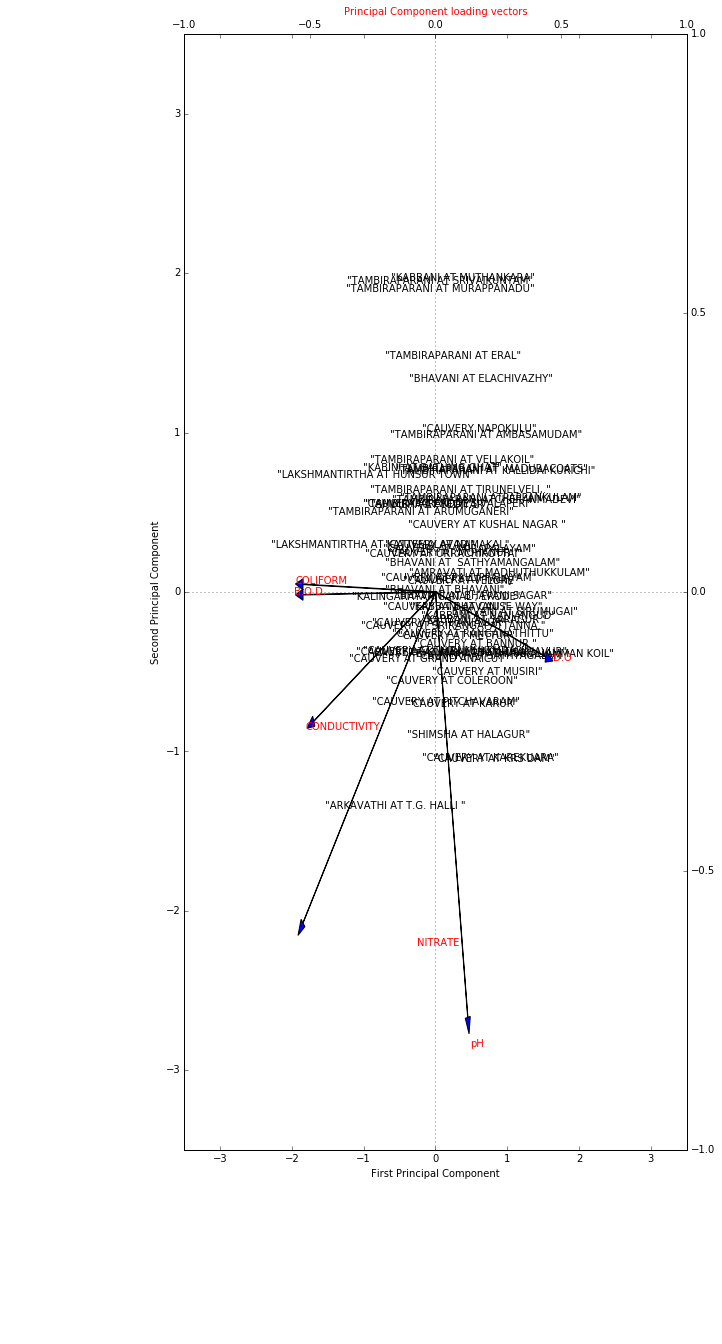

In [51]:
# construct a biplot of the first two principal components using our loading vectors:
#fig = plt.figure(figsize=(9,9))
fig , ax1 = plt.subplots(figsize=(9,20))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
#print(df_plot.index)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    
    # Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[4])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[5])



In [52]:
pca.explained_variance_


array([ 3.35851866,  1.14527897,  1.03806197,  0.28964479,  0.16471375,
        0.00378186])

In [53]:
 pca.explained_variance_ratio_


array([ 0.55975311,  0.19087983,  0.17301033,  0.04827413,  0.02745229,
        0.00063031])

([<matplotlib.axis.XTick at 0x7f963845b410>,
 <a list of 6 Text xticklabel objects>)

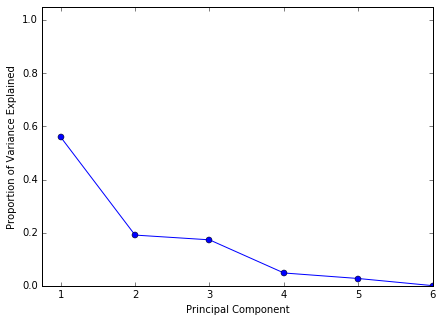

In [55]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])


([<matplotlib.axis.XTick at 0x7f9653c852d0>,
 <a list of 6 Text xticklabel objects>)

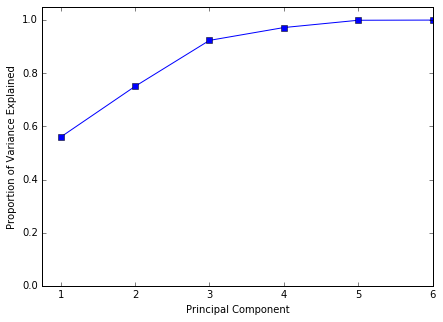

In [56]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])